In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

C:\Users\jmo4cob\AppData\Local\conda\conda\envs\tf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import sys
import tensorflow as tf
import numpy as np
sys.version

'3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 14:34:30) [MSC v.1900 64 bit (AMD64)]'

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

[Dataset](https://s3.amazonaws.com/img-datasets/mnist.npz)

### Load MNIST Dataset

In [5]:
myData = np.load('datasets/mnist.npz')

In [6]:
x_train, y_train = myData['x_train'], myData['y_train']
x_test, y_test = myData['x_test'], myData['y_test']

### Visualize the Training Images

Digit Image - 7


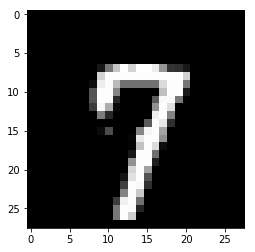

In [7]:
print('Digit Image - {}'.format(y_train[51011]))
plt.imshow(x_train[51011].reshape(28,28), cmap='gray')
plt.show()

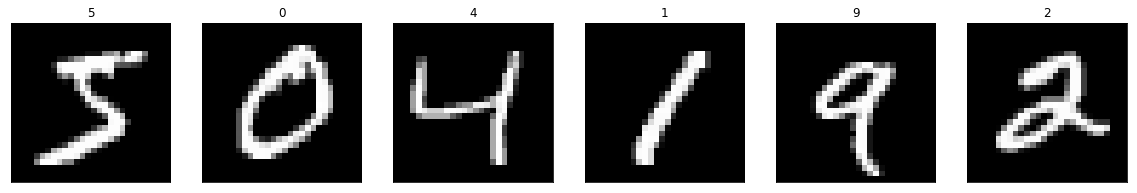

In [8]:
# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(y_train[i]))

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
input_shape = img_rows * img_cols

In [11]:
x_test.shape

(10000, 784)

### Rescale the Images by Dividing Every Pixel in Every Image by 255

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Encode Categorical Integer Labels Using a One-Hot Scheme

In [14]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Define the Model Architecture

In [16]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))                          
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [17]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.10.0


### Compile the Model

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Calculate the Classification Accuracy on the Test Set (Before Training)

In [19]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

Test accuracy: 8.20%


### Train the Model

In [20]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.2881 - acc: 0.9122 - val_loss: 0.1430 - val_acc: 0.9560
Epoch 2/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.1164 - acc: 0.9645 - val_loss: 0.0832 - val_acc: 0.9728
Epoch 3/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0812 - acc: 0.9741 - val_loss: 0.0750 - val_acc: 0.9756
Epoch 4/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0615 - acc: 0.9812 - val_loss: 0.0621 - val_acc: 0.9798
Epoch 5/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.0493 - acc: 0.9842 - val_loss: 0.0660 - val_acc: 0.9790
Epoch 6/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.0413 - acc: 0.9867 - val_loss: 0.0630 - val_acc: 0.9804
Epoch 7/12
60000/60000 [==============================] - 2s 34us/step - loss: 0.0337 - acc: 0.9894 - val_loss: 0.0561 - val_acc

In [21]:
model.save('.\model\myModel_MNIST.h5')

### Load the Model

In [22]:
# load the weights that yielded the best validation accuracy
model.load_weights('.\model\myModel_MNIST.h5')

### Calculate the Classification Accuracy on the Test Set

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy: %.2f'% score[1])

Test loss: 0.0639
Test accuracy: 0.98


Prediction - 3


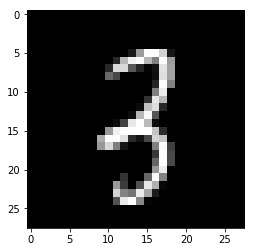

In [24]:
test_digit = 515
#print('Digit Image - {}'.format(myData['y_test'][test_digit]))
print('Prediction - {}'.format(model.predict_classes(x_test[test_digit].reshape(1,784))[0]))
plt.imshow(x_test[test_digit].reshape(28,28), cmap='gray')
plt.show()